In [1]:
### IMPORTS ###
import os
import numpy as np
import pandas as pd

from tqdm.auto import tqdm

from pathlib import Path

C:\Users\b.vaneerden\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# exploration

So original is just the post with all annotations, and SCT and MEDDRA are different types of tags, with SCT non drug terms and Meddra drug terms

In [2]:
# explore data

# original example
pd.read_csv("./data/CADEC.v2/cadec/original/ARTHROTEC.1.ann", sep='\t', header=None)

,0,1,2
0,T1,ADR 9 19,bit drowsy
1,#1,AnnotatorNotes T1,Drowsy
2,T2,ADR 29 50,little blurred vision
3,#2,AnnotatorNotes T2,Blurred Vision
4,T3,Drug 93 102,Arthrotec
5,T5,Disease 179 188,arthritis
6,T6,Symptom 260 265,agony
7,T4,ADR 62 78,gastric problems
8,T7,Symptom 412 417,pains
9,T8,ADR 437 453,feel a bit weird


In [3]:
#  MedDRA example
pd.read_csv("./data/CADEC.v2/cadec/meddra/ARTHROTEC.1.ann", sep='\t', header=None)

,0,1,2
0,TT1,10013649 9 19,bit drowsy
1,TT2,10005886 29 50,little blurred vision
2,TT4,10056819 62 78,gastric problems
3,TT8,10025482 437 453,feel a bit weird


In [4]:
# SCT wxamples
pd.read_csv("./data/CADEC.v2/cadec/sct/ARTHROTEC.1.ann", sep='\t', header=None)

,0,1,2
0,TT1,271782001 | Drowsy | 9 19,bit drowsy
1,TT2,246636008 | Blurred vision - hazy | 29 50,little blurred vision
2,TT4,162076009 | Excessive upper gastrointestinal g...,gastric problems
3,TT3,3384011000036100 | Arthrotec | 93 102,Arthrotec
4,TT5,3723001 | Arthritis | 179 188,arthritis
5,TT6,102498003 | Agony | or 76948002|Severe pain| 2...,agony
6,TT7,22253000 | Pain | 412 417,pains
7,TT8,367391008 | Malaise | 437 453,feel a bit weird


In [5]:
annotation_directory = Path('./data/CADEC.v2/cadec/original')
unique_drugs = set()

for file_path in annotation_directory.glob('*.ann'):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        for line in lines:
            if '\tDrug ' in line:
                drug_name = line.split('\t')[2].strip()
                unique_drugs.add(drug_name)

print('unique drug names: \n')
for i in unique_drugs:
    print(i)

print ("\n num: ", len(unique_drugs))

unique drug names: 

Simcor
pravastatin
arthrotec
zanax
Liptitor
Mev
Zipsor
occupycet
BEZALIP
codine
lovastatin
Relafen
Fosamax 35
glucosamine sulfate
naproxen sodium
Olmetec(olmesartan)
ramipril
Lyrica
Lipitor 20 mg
advil
Steroid shots
Folgard
Estrace
Glyburide
Niaspan
ezetimbe
SIMVISTATIN
Zestril
coq10
saw palmetto
tagamet
lasix
Red Yeast Rice
co-codamol
Lipitor(atorvastatin)
POLICOSANOL
Pravachol
CoQ
Voltaren Rapid
co q 10
hydrocodine
IB 800 mg
Arthrotec 75
misoprostal
flu jab
Lipitor
steriod shots
Q10
DARVACET
ALEVE
coenzyme Q10
Tylenol
Vioxx
Atenolol
lipoic acid
Zocor
Relefen
CQ-10
provachol
coenzyme10
lipitor
fish oil
nexium
zoloft
B3
prednisone
Liptor
misoprostol
Cambia
Birth control pills
Zorcor
Fish Oil
astaxanthan
NIACIN
Vitorin
Lopid (Gemfibrozil)
Aciphex
prilosec
MSM
Baycol
demerol
Pravichol
atorvastatin
niaspan
Flector patch
CoQ10
cortisone shot
Nosterol
Lisinopril
testosterone
tylenol #3
Nitro
Lescol
Cataflam
fish oil (salmon)
Lipitor 20mg
Meloxicam
Gemfibrozil
Red Yeast


In [6]:
#drugs from paper

Drugs = ['ARTHROTEC', 'CAMBIA', 'CATAFLAM', 'DICLOFENAC-POTASSIUM', 'DICLOFENAC-SODIUM',
         'FLECTOR', 'LIPITOR', 'PENNSAID', 'SOLARAZE', 'VOLTAREN', 'VOLTAREN-XR', 'ZIPSOR']

In [8]:
reports_per_drug = dict()
print('amount of reports for each drug: \n')

# iterate over each drug
for drug in Drugs:
    reports_directory = Path('./data/CADEC.v2/cadec/original')
    
    drug_files = reports_directory.glob(drug + '*.ann')
    num_reports_for_current_drug = sum(1 for file in drug_files)
    reports_per_drug[drug] = num_reports_for_current_drug
    print(f'{drug}: {num_reports_for_current_drug}')

amount of reports for each drug: 

ARTHROTEC: 145
CAMBIA: 4
CATAFLAM: 10
DICLOFENAC-POTASSIUM: 3
DICLOFENAC-SODIUM: 7
FLECTOR: 1
LIPITOR: 1000
PENNSAID: 4
SOLARAZE: 3
VOLTAREN: 68
VOLTAREN-XR: 22
ZIPSOR: 5


In [10]:
# not all reports have annotations
Tags = dict()  
Empty_tags = dict()   

for drug in Drugs:
    print(drug, ':')
    Files = Path('./data/CADEC.v2/cadec/original').glob(drug+'*.ann')
    lst = list()
    count = 0
    for file in Files:
        try:
            data = pd.read_csv(file, sep='\t', header=None)
            lst.extend(data.iloc[:,1].tolist())
        except:
            st = os.stat(file)
            print(f"size is {st.st_size} for {file}")
            count += 1
    print('\n')
    Tags[drug] = lst
    Empty_tags[drug] = count

ARTHROTEC :


CAMBIA :
size is 0 for data\CADEC.v2\cadec\original\CAMBIA.1.ann


CATAFLAM :


DICLOFENAC-POTASSIUM :


DICLOFENAC-SODIUM :


FLECTOR :


LIPITOR :
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.197.ann
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.243.ann
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.28.ann
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.285.ann
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.299.ann
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.308.ann
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.313.ann
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.383.ann
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.4.ann
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.40.ann
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.41.ann
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.416.ann
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.437.ann
size is 0 for data\CADEC.v2\cadec\original\LIPITOR.438.ann
size is 0 for da

In [11]:
# an example of a report without tags
notags = open('./data/CADEC.v2/cadec/text/CAMBIA.1.txt')
print(notags.read())

Didn't work.



In [22]:
# COUNTS = {'Total Number of Reports':list(reports_per_drug.values()), 
#           'Number of Reports without Name Entities':list(Empty_tags.values())}
# pd.DataFrame(COUNTS, index=Drugs).to_latex()

# number of reports with no tags
print (f"Amount of reports without annotations: {sum(Empty_tags.values())}\n")



# number of reports per drug, and amount of reports without annotations per drug
print ("Number of reports per drug, and amount of reports without annotations per drug:")
for drug in Drugs:
    print (f"{drug}: {reports_per_drug[drug]}, {Empty_tags[drug]}")

Amount of reports without annotations: 70

Number of reports per drug, and amount of reports without annotations per drug:
ARTHROTEC: 145, 0
CAMBIA: 4, 1
CATAFLAM: 10, 0
DICLOFENAC-POTASSIUM: 3, 0
DICLOFENAC-SODIUM: 7, 0
FLECTOR: 1, 0
LIPITOR: 1000, 54
PENNSAID: 4, 1
SOLARAZE: 3, 2
VOLTAREN: 68, 6
VOLTAREN-XR: 22, 6
ZIPSOR: 5, 0


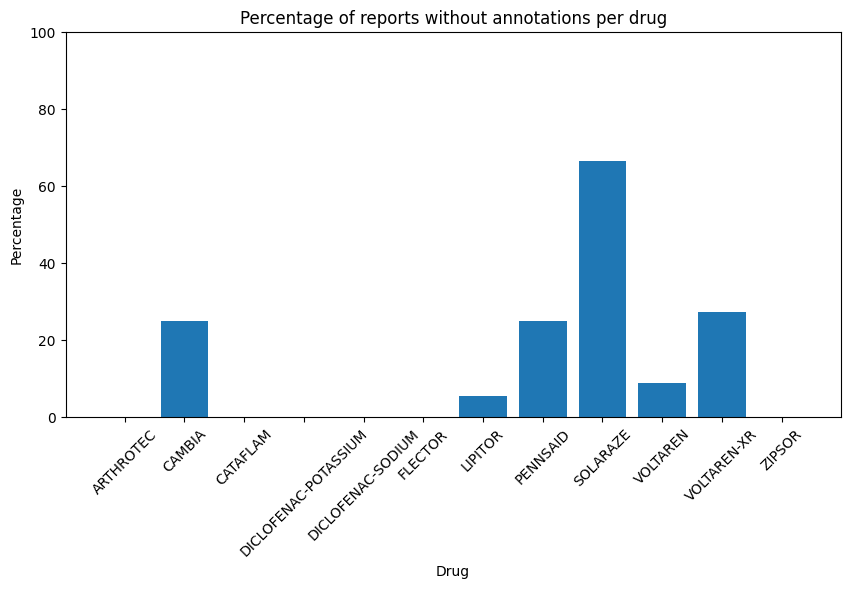

In [23]:
# plot percentage of reports without annotations per drug
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.title('Percentage of reports without annotations per drug')
plt.xlabel('Drug')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.ylim(0,100)
plt.bar(Empty_tags.keys(), [100*Empty_tags[drug]/reports_per_drug[drug] for drug in Empty_tags.keys()])
plt.show()

In [31]:
import re

def extract_first_part(tag):
    return re.findall('(\S+)\s', tag)[0]

def process_tags(drug, tags):
    unique_first_parts = sorted(set(extract_first_part(tag) for tag in tags))
    return f"{drug}: {unique_first_parts}"

# Types of named entities for each drug
for drug in Drugs:
    tags_for_drug = Tags[drug]
    result = process_tags(drug, tags_for_drug)
    print(result)


ARTHROTEC: ['ADR', 'AnnotatorNotes', 'Disease', 'Drug', 'Finding', 'Symptom']
CAMBIA: ['ADR', 'AnnotatorNotes', 'Disease', 'Drug', 'Finding']
CATAFLAM: ['ADR', 'AnnotatorNotes', 'Disease', 'Drug', 'Finding', 'Symptom']
DICLOFENAC-POTASSIUM: ['ADR', 'AnnotatorNotes', 'Symptom']
DICLOFENAC-SODIUM: ['ADR', 'AnnotatorNotes', 'Disease', 'Drug', 'Symptom']
FLECTOR: ['Disease', 'Drug', 'Symptom']
LIPITOR: ['ADR', 'AnnotatorNotes', 'Disease', 'Drug', 'Finding', 'Symptom']
PENNSAID: ['ADR', 'AnnotatorNotes', 'Drug', 'Finding', 'Symptom']
SOLARAZE: ['ADR', 'AnnotatorNotes', 'Disease', 'Drug']
VOLTAREN: ['ADR', 'AnnotatorNotes', 'Disease', 'Drug', 'Finding', 'Symptom']
VOLTAREN-XR: ['ADR', 'AnnotatorNotes', 'Disease', 'Drug', 'Finding', 'Symptom']
ZIPSOR: ['ADR', 'Disease', 'Drug', 'Finding', 'Symptom']


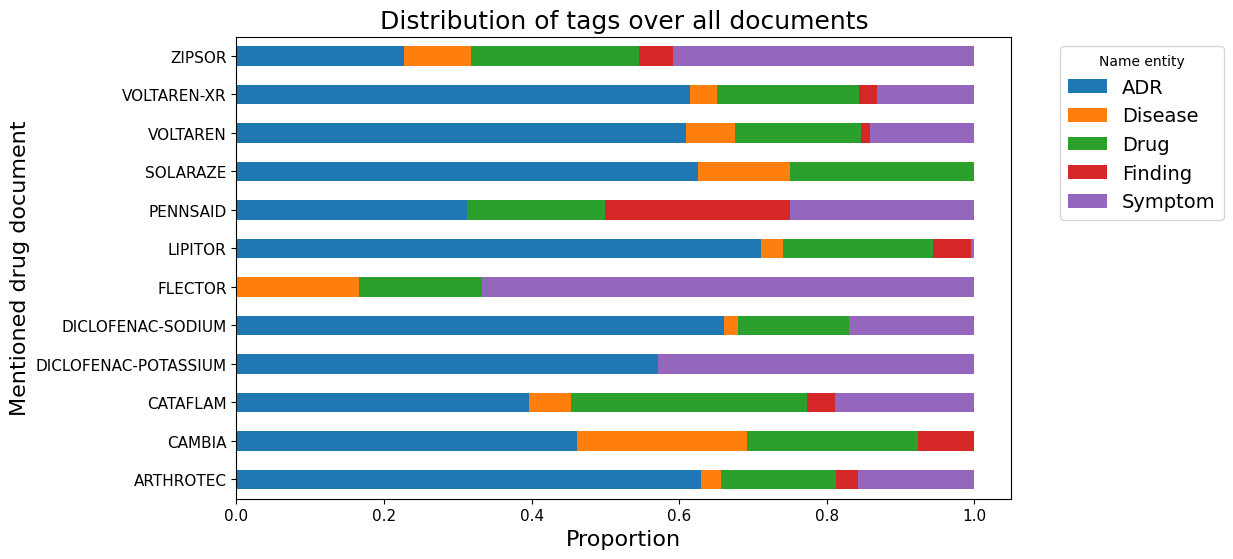

In [38]:
import matplotlib.pyplot as plt
import numpy as np

row, col, r = 4, 3, 1.2

def count_tags(raw_tags):
    Count_NE = dict()
    for entity in ['ADR', 'Disease', 'Drug', 'Finding', 'Symptom']:
        Count_NE[entity] = sum([1 for ele in raw_tags if ele.startswith(entity)])
    return Count_NE

df = dict()
for drug in Drugs:
    df[drug] = list(count_tags(Tags[drug]).values())
df = pd.DataFrame(df, index=['ADR', 'Disease', 'Drug', 'Finding', 'Symptom']).transpose() # dataframe of tag counts across drugs
df = df.div(df.sum(axis=1), axis=0)  # normalize by rows
df['Name'] = Drugs
df.plot(x = 'Name', kind = 'barh', stacked=True, mark_right=True, figsize=(10,6), fontsize=11)
plt.title('Distribution of tags over all documents', fontsize=18)
plt.xlabel('Proportion', fontsize=16)
plt.ylabel('Mentioned drug document', fontsize=16)
plt.legend(title='Name entity', bbox_to_anchor=(1.05,1), loc='upper left', fontsize=14)
plt.show()
